# Hút thuốc khi mang thai và sức khỏe trẻ sơ sinh

## Vấn đề / Câu hỏi cần nghiên cứu
- Hút thuốc trong thai kì có thể dẫn đến những tổn thương cho thai nhi, sinh non hoặc trẻ bị nhẹ cân khi sinh
- Trong bài báo cáo này, chúng ta sẽ so sánh cân nặng của trẻ sơ sinh được sinh ra bởi người mẹ hút thuốc và không hút thuốc để chứng thực cảnh báo của Surgeon General (cảnh báo trên)

## Dữ liệu
- Dữ liệu được cung cấp là một phần của Child Health and Development Studies (CHDS) - dữ liệu thống kê từ tất cả các ca mang thai từ năm 1960 đến 1967 của phụ nữ thuộc Kaiser Foundation Health Plan, khu vực San Francisco–East Bay
- Dữ liệu trong bài này là một phần của tập trên, tính riêng cho vùng Oakland, California

## Cơ sở và phương pháp nghiên cứu


## Câu hỏi

### Ex 01

In [8]:
import numpy as np

In [9]:

labels = [[0, 5], 
          [5, 10], 
          [10, 15], 
          [15, 20], 
          [20, 30], 
          [30, 40],
          [40, 60]]

v = [16, 25, 14, 4, 32, 5, 4]
v = [int(round(i/100 * 484, 0)) for i in v]

dat = []
for i in range(len(labels)):
  dat += [i] * v[i]
  
data = np.array(dat)

In [10]:
import numpy as np

prb = [0.25, 0.5, 0.75]
qt = np.quantile(data, prb)
for j in range(len(prb)):
  print(f'quantile {prb[j]} \t : \t {labels[int(qt[j])]}')
qt


quantile 0.25 	 : 	 [5, 10]
quantile 0.5 	 : 	 [10, 15]
quantile 0.75 	 : 	 [20, 30]


array([1., 2., 4.])

### Ex 02
Ta thấy rằng, các cột tương ứng với số lượng nhỏ hơn 15 không thay đổi, ngược lại do đã gộp các dữ liệu lớn hơn 15 nên phần diện tích ứng với đoạn [15, 60] tăng lên đáng kể

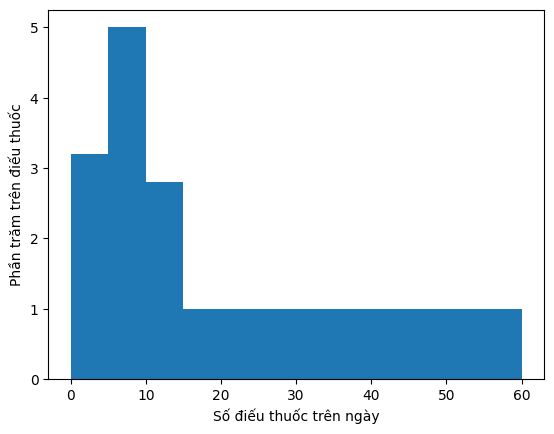

In [11]:
import matplotlib.pyplot as plt

combine_labels = [[0, 5], 
          [5, 10], 
          [10, 15], 
          [15, 60]]

v = [16, 25, 14, 45]
# v = [int(round(i/100 * 484, 0)) for i in v]

c = [v[i]/(combine_labels[i][1] - combine_labels[i][0]) for i in range(len(v))]
x = [2.5, 7.5, 12.5, 37.5]
widths = [5, 5, 5, 45]

fig, ax = plt.subplots()
ax.bar(x, c, width=widths)
plt.xlabel('Số điếu thuốc trên ngày')
plt.ylabel('Phần trăm trên điếu thuốc')
plt.show()
  

### Ex 03
Do tổng diện tích của các cột bằng 1 và chiều rộng của cột bị thiếu bằng 5 nên ta có thể tính được chiều cao của cột theo công thức dưới đây

In [12]:
h = (1 - (2*0.5 + 2*2 + 2*4.5 + 2*6.5 + 4*6 + 5*4.8 + 10*0.9 + 10*0.1)/100)/5
h

0.030000000000000006

### Ex 04
Đường quantiles tương đối thẳng nên ta có thể nói rằng phân bố chiều cao và cân nặng của người cha tuân theo phân bố chuẩn

### Ex 05

### Ex 06
Chúng ta có thể load dữ liệu lên rồi đếm số người có chiều cao trong các khoảng tương ứng.

In [13]:
import pandas as pd

df = pd.read_csv('../data/babies.csv')
df = df.dropna()

df = df.astype('int32')

df2 = df.query('height < 64.5 & height > 61.5')

df2.size / df.size

0.3977853492333901

Ước lượng với xấp xỉ phân bố chuẩn
$p = \Phi(\frac{64.5 - 64}{2.5}) - \Phi(\frac{61.5 - 64}{2.5})$

In [14]:
from scipy.stats import norm

prob = norm(loc = 64, scale = 2.5).cdf(64.5) - norm(loc = 64, scale = 2.5).cdf(61.5)
prob

0.4206044555076459

### Ex 7

### Ex 8

### Ex 9

In [15]:
categories = ['Married', 'Single', 'Under 12', '12', 'Over 12', 'Under 18', '18–19', '20–24', '25–29', '30–34', 'Over 34']
percent_mothers = [90, 10, 21, 46, 33, 5, 9, 35, 32, 15, 4]
percent_smokers = [27, 55, 55, 29, 15, 43, 44, 34, 23, 21, 26]
percent_non_smokers = [100 - i for i in percent_smokers]
percent_non_smokers

[73, 45, 45, 71, 85, 57, 56, 66, 77, 79, 74]

### Ex 10

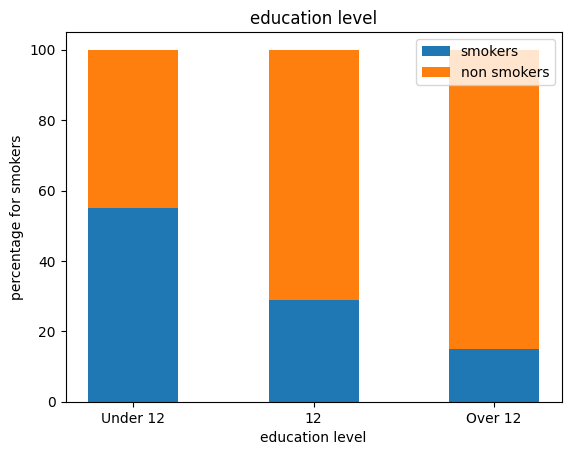

In [19]:
import matplotlib.pyplot as plt
import numpy as np

education_categories = ['Under 12', '12', 'Over 12']
percent_mothers = [21, 46, 33]
percent_smokers = [55, 29, 15]
percent_non_smokers = [100 - i for i in percent_smokers]

weight = {
  'smokers': percent_smokers,
  'non smokers': percent_non_smokers
}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)
for boolean, w in weight.items():
    p = ax.bar(education_categories, w, width, label=boolean, bottom=bottom)
    bottom += w

ax.legend(loc="upper right")
plt.title('education level')
plt.xlabel('education level')
plt.ylabel('percentage for smokers')
plt.show()